# **IMPORTS**
Importing all the required modules

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **ASSIGNING DIRECTORIES**
Making variables pointing to correct Train, Validation and Test directories

In [5]:
base_dir = os.path.join(os.path.dirname("/content/drive/My Drive/Dataset_new"), 'Dataset_new')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')
val_dir = os.path.join(base_dir, 'Validation')

train_yes_dir = os.path.join(train_dir, 'Yes')
train_no_dir = os.path.join(train_dir, 'No') 
test_yes_dir = os.path.join(test_dir, 'Yes') 
test_no_dir = os.path.join(test_dir, 'No')  
val_yes_dir = os.path.join(val_dir, 'Yes')
val_no_dir = os.path.join(val_dir, 'No')

In [6]:
num_yes_tr = len(os.listdir(train_yes_dir))
num_no_tr = len(os.listdir(train_no_dir))

num_yes_te = len(os.listdir(test_yes_dir))
num_no_te = len(os.listdir(test_no_dir))

num_yes_val = len(os.listdir(val_yes_dir))
num_no_val = len(os.listdir(val_no_dir))

total_train = num_yes_tr + num_no_tr
total_test = num_yes_te + num_no_te
total_val = num_yes_val + num_no_val

In [7]:
print('total training yes images:', num_yes_tr)
print('total training no images:', num_no_tr)

print('total test yes images:', num_yes_te)
print('total test no images:', num_no_te)

print('total validation yes images:', num_yes_val)
print('total validation no images:', num_no_val)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_test)
print("Total validation images:", total_val)

total training yes images: 208
total training no images: 208
total test yes images: 51
total test no images: 53
total validation yes images: 52
total validation no images: 52
--
Total training images: 416
Total test images: 104
Total validation images: 104


# **DATASET GENERATION**
Preparing the dataset for model to run

In [8]:
BATCH_SIZE = 26
IMG_SHAPE = 200

In [9]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           #color_mode = 'grayscale',
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(200,200)
                                                           class_mode='binary')

Found 416 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(200,200)
                                                              class_mode='binary')

Found 104 images belonging to 2 classes.


# **VISUALIZING DATA**
Having a look at the data the code is dealing with

In [12]:
sample_training_images, _ = next(train_data_gen) 

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

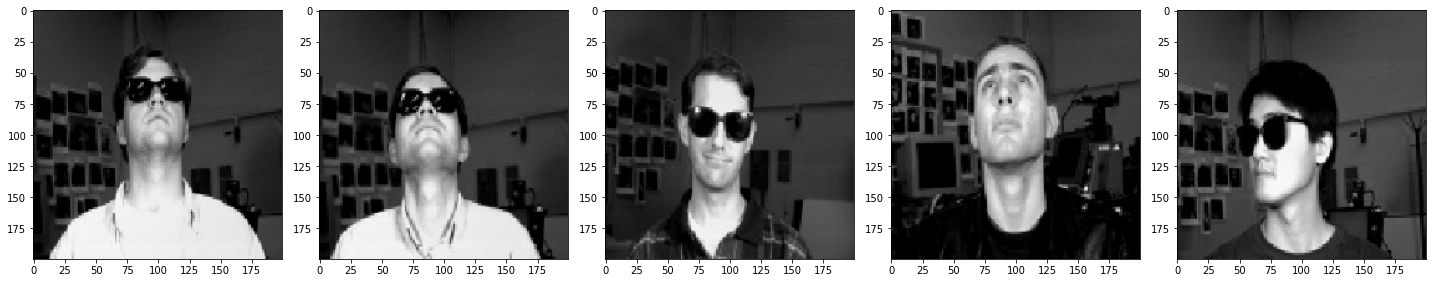

In [14]:
plotImages(sample_training_images[:5])  # Plot images 0-4

# **MODEL**
Defining, compiling, fitting and training the model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [18]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
16/16 [==============================] - 327s 20s/step - loss: 0.7100 - accuracy: 0.5409 - val_loss: 0.5393 - val_accuracy: 0.9038
Epoch 2/100
16/16 [==============================] - 2s 100ms/step - loss: 0.4172 - accuracy: 0.8101 - val_loss: 0.2878 - val_accuracy: 0.8654
Epoch 3/100
16/16 [==============================] - 2s 97ms/step - loss: 0.1600 - accuracy: 0.9399 - val_loss: 0.1889 - val_accuracy: 0.9327
Epoch 4/100
16/16 [==============================] - 2s 98ms/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 0.1912 - val_accuracy: 0.9519
Epoch 5/100
16/16 [==============================] - 2s 95ms/step - loss: 0.0812 - accuracy: 0.9760 - val_loss: 0.2239 - val_accuracy: 0.9615
Epoch 6/100
16/16 [==============================] - 2s 98ms/step - loss: 0.0495 - accuracy: 0.9808 - val_loss: 0.1861 - val_accuracy: 0.9615
Epoch 7/100
16/16 [==============================] - 2s 96ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.1612 - val_accuracy: 0.9615
Epoc

# **VISUALIZING THE TRAINING RESULTS**
Looking at the results

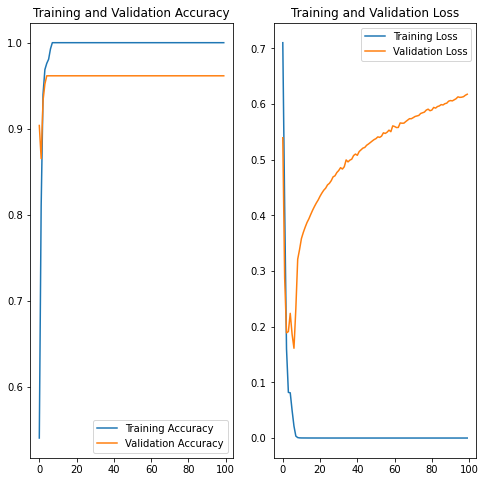

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

# **TESTING**

In [20]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(200,200)
                                                              class_mode='binary')

Found 104 images belonging to 2 classes.


In [21]:
test_loss, test_accuracy = model.evaluate(test_data_gen, steps=4)
print('Accuracy on test dataset:', test_accuracy)

4/4 [==============================] - 57s 14s/step - loss: 0.2252 - accuracy: 0.9712
Accuracy on test dataset: 0.9711538553237915
